<b><font size="6">Techscape</font><a class="anchor"><a id='toc'></a></b><br>

In [ ]:
# Johnny esteve aqui

In [52]:
import pandas as pd
import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
techscape = pd.read_csv('train.csv')
techscape.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [54]:
#techscape.GoogleAnalytics_PageValue.value_counts()

In [55]:
# No missing values
techscape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [56]:
# Change types of variables

# ID does not make sense to be a int
techscape.Access_ID = techscape.Access_ID.astype('string') 

# Tranform Date into a datetime format
techscape.Date = pd.to_datetime(techscape.Date)

techscape.OS = techscape.OS.astype('string') 


techscape.Country = techscape.Country.astype('string') 


techscape.Type_of_Visitor = techscape.Type_of_Visitor.astype('string') 

techscape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Access_ID                   9999 non-null   string        
 1   Date                        9999 non-null   datetime64[ns]
 2   AccountMng_Pages            9999 non-null   int64         
 3   AccountMng_Duration         9999 non-null   float64       
 4   FAQ_Pages                   9999 non-null   int64         
 5   FAQ_Duration                9999 non-null   float64       
 6   Product_Pages               9999 non-null   int64         
 7   Product_Duration            9999 non-null   float64       
 8   GoogleAnalytics_BounceRate  9999 non-null   float64       
 9   GoogleAnalytics_ExitRate    9999 non-null   float64       
 10  GoogleAnalytics_PageValue   9999 non-null   float64       
 11  OS                          9999 non-null   string      

In [57]:
# Let's see if data has outliers --> we can remove a maximum of 3% (300 observations) 

techscape[['AccountMng_Pages', 'FAQ_Pages', 'Product_Pages']].describe().T

# AccountMng_Pages appears to have outliers
# Same with FAQ_Pages
# Product_Pages definitely has outliers

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,9999.0,2.324232,3.340676,0.0,0.0,1.0,4.0,27.0
FAQ_Pages,9999.0,0.508051,1.279390,0.0,0.0,0.0,0.0,24.0
Product_Pages,9999.0,31.685869,44.550277,0.0,7.0,18.0,38.0,705.0


{'whiskers': [<matplotlib.lines.Line2D at 0x27da9ea82b0>,
 'caps': [<matplotlib.lines.Line2D at 0x27da9ea8970>,
 'boxes': [<matplotlib.lines.Line2D at 0x27da9e9aee0>],
 'medians': [<matplotlib.lines.Line2D at 0x27da9eb3070>],
 'fliers': [<matplotlib.lines.Line2D at 0x27da9eb33d0>],
 'means': []}

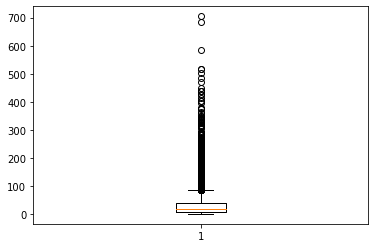

In [68]:
#plt.boxplot(x=techscape['AccountMng_Pages'])
#plt.boxplot(x=techscape['FAQ_Pages'])
plt.boxplot(x=techscape['Product_Pages'])

In [58]:
techscape[['AccountMng_Duration', 'FAQ_Duration', 'Product_Duration']].describe().T

# Same logic here

,count,mean,std,min,25%,50%,75%,max
AccountMng_Duration,9999.0,81.205854,179.715545,0.0,0.0000,7.5,92.20835,3398.7500
FAQ_Duration,9999.0,34.559101,139.796989,0.0,0.0000,0.0,0.00000,2549.3750
Product_Duration,9999.0,1199.769430,1958.276304,0.0,183.5625,599.0,1470.27080,63973.5222


In [59]:
techscape[['GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'Browser', 'Type_of_Traffic']].describe().T

# GoogleAnalytics_PageValue appear to have outliers

,count,mean,std,min,25%,50%,75%,max
GoogleAnalytics_BounceRate,9999.0,0.022305,0.048776,0.0,0.0000,0.0032,0.0168,0.2000
GoogleAnalytics_ExitRate,9999.0,0.043181,0.048845,0.0,0.0143,0.0251,0.0500,0.2000
GoogleAnalytics_PageValue,9999.0,5.963120,18.753626,0.0,0.0000,0.0000,0.0000,361.7637
Browser,9999.0,2.352535,1.715698,1.0,2.0000,2.0000,2.0000,13.0000
Type_of_Traffic,9999.0,3.957496,3.675159,1.0,2.0000,2.0000,4.0000,15.0000


{'whiskers': [<matplotlib.lines.Line2D at 0x27da9cb9580>,
 'caps': [<matplotlib.lines.Line2D at 0x27da9cb9c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x27da9cb9220>],
 'medians': [<matplotlib.lines.Line2D at 0x27da9cc2370>],
 'fliers': [<matplotlib.lines.Line2D at 0x27da9cc26d0>],
 'means': []}

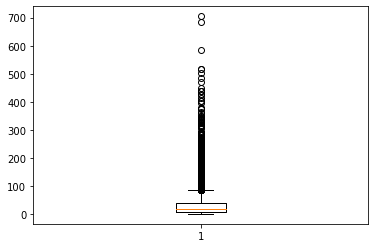

In [51]:
# Define data as all the independent variable
data = techscape.drop(['Buy'], axis=1)
# Define target as the dependent variable
target = techscape['Buy']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data, target, train_size=0.75, stratify = target, random_state=5)
# Train 0.75 || Valid 0.25
# Stratify so we have the same values in target in the train and val datasets